#**1)Install PySpark in Google Colab**

In [1]:
!pip install pyspark

In [4]:
!pyspark --version

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /___/ .__/\_,_/_/ /_/\_\   version 3.5.3
      /_/
                        
Using Scala version 2.12.18, OpenJDK 64-Bit Server VM, 11.0.25
Branch HEAD
Compiled by user haejoon.lee on 2024-09-09T05:20:05Z
Revision 32232e9ed33bb16b93ad58cfde8b82e0f07c0970
Url https://github.com/apache/spark
Type --help for more information.


#**2)Setup and Initialize PySpark**

In [8]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("AQISPARK") .getOrCreate()

In [7]:
print(spark.version)

3.5.3


#**3)Load the dataset prepared by you**

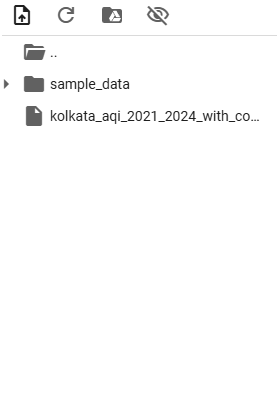

#**4)Load the dataset file into a PySpark DataFrame**

In [9]:
file_path = "/content/kolkata_aqi_2021_2024_with_components.csv"

In [10]:
data1 = spark.read.csv(file_path, header=True, inferSchema=True)

In [12]:
data1.show()

+-------------------+---+-------+------+------+------+------+------+-------+------+
|               Date|AQI|     CO|    NO|   NO2|    O3|   SO2| PM2_5|   PM10|   NH3|
+-------------------+---+-------+------+------+------+------+------+-------+------+
|2021-01-01 00:00:00|  5|1735.69|  0.43| 52.09| 16.81| 42.44|306.22|  340.9|  7.73|
|2021-01-01 01:00:00|  5|2136.23|  5.53| 59.63|  4.43| 47.68|336.27| 378.39| 11.91|
|2021-01-01 02:00:00|  5|2857.21| 25.03| 61.69|  1.29| 61.99|380.62| 437.19| 20.77|
|2021-01-01 03:00:00|  5|2990.72| 33.98| 65.12| 10.01| 74.39|380.91| 444.49|  26.6|
|2021-01-01 04:00:00|  5|2243.04| 18.11| 66.49| 43.27| 103.0|333.07| 384.09| 20.52|
|2021-01-01 05:00:00|  5|1976.01| 13.08| 65.12| 82.97|118.26|323.14|  370.9| 18.49|
|2021-01-01 06:00:00|  5|1735.69|  9.16| 61.01|125.89|125.89|318.36| 362.85| 15.96|
|2021-01-01 07:00:00|  5|1148.22|   4.3| 39.07|174.52| 104.9|235.88|  261.0|  8.61|
|2021-01-01 08:00:00|  5| 974.66|  2.99| 32.56|188.83| 89.65| 192.5|  210.6|

##**1.Verify the Schema**

In [13]:
data1.printSchema()

root
 |-- Date: timestamp (nullable = true)
 |-- AQI: integer (nullable = true)
 |-- CO: double (nullable = true)
 |-- NO: double (nullable = true)
 |-- NO2: double (nullable = true)
 |-- O3: double (nullable = true)
 |-- SO2: double (nullable = true)
 |-- PM2_5: double (nullable = true)
 |-- PM10: double (nullable = true)
 |-- NH3: double (nullable = true)



#**5)Apply one filter operation on an attribute belonging to the dataset**

In [29]:
filtered_data = data1.filter(data1["AQI"] == 4)

In [30]:
filtered_data.show()

+-------------------+---+------+----+-----+------+-----+-----+-----+-----+
|               Date|AQI|    CO|  NO|  NO2|    O3|  SO2|PM2_5| PM10|  NH3|
+-------------------+---+------+----+-----+------+-----+-----+-----+-----+
|2021-02-07 07:00:00|  4|607.49|1.51|16.11|151.63|38.15|40.48|48.93| 6.14|
|2021-02-07 08:00:00|  4|520.71|1.22|12.51|151.63|30.04|32.23|38.26| 5.13|
|2021-02-07 09:00:00|  4|500.68|1.17|13.02|153.07|30.99|33.08|38.88| 5.32|
|2021-02-07 10:00:00|  4|647.54|1.75|23.31|143.05|42.92|43.72|52.71| 8.99|
|2021-03-09 20:00:00|  4|774.38|1.23|32.56|  6.44| 39.1|48.77|70.92|13.05|
|2021-03-09 21:00:00|  4| 714.3|0.43|29.82| 11.44|38.15|45.92|65.75|11.91|
|2021-03-09 22:00:00|  4| 687.6|0.32|29.13| 13.23|38.62|44.95|63.07|11.02|
|2021-03-09 23:00:00|  4|674.25|0.44|28.45|  11.8|38.62|43.42|60.18|10.13|
|2021-03-10 00:00:00|  4|680.92|0.94|28.79|   8.4| 39.1|42.54|58.69| 9.63|
|2021-03-10 01:00:00|  4|834.47|3.52|32.22|   3.8|44.82|49.02|66.83|11.91|
|2021-04-01 19:00:00|  4|

#**6)Group the data by the value of an attribute and apply the  sum function on the attribute**

##**1)Group by Date and Sum AQI**

In [36]:
from pyspark.sql.functions import date_format, col, sum

In [38]:
# Extract year-month from the Date column
data1_with_month = data1.withColumn("Year_Month", date_format(col("Date"), "yyyy-MM"))

In [39]:
# Group by the Year-Month column and calculate the total AQI
monthly_aqi_sum = data1_with_month.groupBy("Year_Month").agg(sum("AQI").alias("Total_AQI"))


In [40]:
monthly_aqi_sum.show()

+----------+---------+
|Year_Month|Total_AQI|
+----------+---------+
|   2024-09|     2713|
|   2023-08|     3175|
|   2024-02|     3473|
|   2021-07|     3194|
|   2022-04|     2882|
|   2023-12|     3701|
|   2021-04|     3481|
|   2023-11|     3501|
|   2022-06|     3056|
|   2021-06|     3349|
|   2022-02|     3241|
|   2022-08|     3158|
|   2023-07|     2275|
|   2021-11|     3605|
|   2024-08|     2993|
|   2023-03|     3485|
|   2023-10|     3435|
|   2021-03|     3719|
|   2021-02|     3356|
|   2022-07|     2553|
+----------+---------+
only showing top 20 rows



##**2)Group by AQI and Sum Another Attribute (PM2_5)**

In [41]:
grouped_data = data1.groupBy("AQI").agg(sum("PM2_5").alias("Total_PM2_5"))


In [42]:
grouped_data.show()

+---+------------------+
|AQI|       Total_PM2_5|
+---+------------------+
|  1| 665.5800000000003|
|  3|108314.07999999993|
|  5| 7162574.940000003|
|  4|223817.43999999957|
|  2| 28713.29999999997|
+---+------------------+



#**7) Based on your understanding, add a new column from the existing attributes to the dataset.**

In [49]:
from pyspark.sql.functions import when, col

In [50]:
data1_with_co_category = data1.withColumn(
    "CO_Category",
    when(col("CO") <= 2000, "Low")
    .when((col("CO") > 2000) & (col("CO") <= 4000), "Moderate")
    .when((col("CO") > 4000) & (col("CO") <= 6000), "High")
    .otherwise("Very High")
)

In [52]:
data1_with_co_category.show()

+-------------------+---+-------+------+------+------+------+------+-------+------+-----------+
|               Date|AQI|     CO|    NO|   NO2|    O3|   SO2| PM2_5|   PM10|   NH3|CO_Category|
+-------------------+---+-------+------+------+------+------+------+-------+------+-----------+
|2021-01-01 00:00:00|  5|1735.69|  0.43| 52.09| 16.81| 42.44|306.22|  340.9|  7.73|        Low|
|2021-01-01 01:00:00|  5|2136.23|  5.53| 59.63|  4.43| 47.68|336.27| 378.39| 11.91|   Moderate|
|2021-01-01 02:00:00|  5|2857.21| 25.03| 61.69|  1.29| 61.99|380.62| 437.19| 20.77|   Moderate|
|2021-01-01 03:00:00|  5|2990.72| 33.98| 65.12| 10.01| 74.39|380.91| 444.49|  26.6|   Moderate|
|2021-01-01 04:00:00|  5|2243.04| 18.11| 66.49| 43.27| 103.0|333.07| 384.09| 20.52|   Moderate|
|2021-01-01 05:00:00|  5|1976.01| 13.08| 65.12| 82.97|118.26|323.14|  370.9| 18.49|        Low|
|2021-01-01 06:00:00|  5|1735.69|  9.16| 61.01|125.89|125.89|318.36| 362.85| 15.96|        Low|
|2021-01-01 07:00:00|  5|1148.22|   4.3|

#**8)Setup Spark and Import Libraries for Machine Learning**

In [53]:
from pyspark.sql import SparkSession
from pyspark.ml import *
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

#**9)Based on the nature of the attributes, apply any one regression and/or classification algorithm to the prepared data. Remember, you need to use the ML models available in Pyspark. Do not use classical ML models.**

In [66]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

In [67]:
spark = SparkSession.builder \
    .appName("AQI Prediction") \
    .getOrCreate()


In [68]:
data2 = spark.read.csv("/content/kolkata_aqi_2021_2024_with_components.csv", header=True, inferSchema=True)

In [69]:
assembler = VectorAssembler(inputCols=["CO", "NO", "NO2", "O3", "PM2_5", "PM10", "NH3"], outputCol="features")

In [70]:
df = assembler.transform(data2)

In [71]:
train_data, test_data = df.randomSplit([0.8, 0.2], seed=1234)

In [72]:
rf = RandomForestRegressor(featuresCol="features", labelCol="AQI")

In [64]:
lr_model = lr.fit(train_data)

In [73]:
rf_model = rf.fit(train_data)

In [74]:
predictions = rf_model.transform(test_data)


In [75]:
predictions.select("features", "AQI", "prediction").show(5)

+--------------------+---+-----------------+
|            features|AQI|       prediction|
+--------------------+---+-----------------+
|[2136.23,5.53,59....|  5|4.999921264451956|
|[2243.04,18.11,66...|  5|4.999812735288327|
|[2429.96,3.19,73....|  5|4.999921264451956|
|[2109.53,2.07,50....|  5|4.999921264451956|
|[2296.45,8.27,50....|  5|4.999921264451956|
+--------------------+---+-----------------+
only showing top 5 rows



In [76]:
evaluator = RegressionEvaluator(labelCol="AQI", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)


In [77]:
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 0.3008940350196318


#**10)Create a synthetic dataset with 10,00,000 rows and three columns where the first column is id, 2nd and 3rd columns are numeric values randomly generated using Python functions**

In [78]:
import pandas as pd
import numpy as np

In [79]:
def generate_synthetic_data(rows):
    # Generate 'id' as a range of numbers from 1 to `rows`
    ids = np.arange(1, rows + 1)

    # Generate random numeric data for column 2 (float values between 0 and 100)
    column_2 = np.random.rand(rows) * 100

    # Generate random integer data for column 3 (integers between 1 and 100)
    column_3 = np.random.randint(1, 100, size=rows)

    # Create a pandas DataFrame with the generated data
    data = pd.DataFrame({
        'id': ids,
        'column_2': column_2,
        'column_3': column_3
    })

    return data

In [80]:
synthetic_data = generate_synthetic_data(1000000)


In [81]:
synthetic_data.head()

,id,column_2,column_3
0,1,68.638981,38
1,2,16.107090,61
2,3,46.827666,25
3,4,72.243346,24
4,5,94.610237,30


In [82]:
from google.colab import files

In [83]:
file_path = '/content/synthetic_data.csv'
synthetic_data.to_csv(file_path, index=False)

In [84]:
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

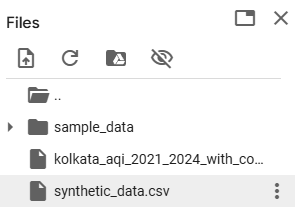

#**11)Load the created dataset and Apply Aggregation Functions**

In [85]:
data_spark = spark.read.csv("/content/synthetic_data.csv", header=True, inferSchema=True)
data_spark.printSchema()

root
 |-- id: integer (nullable = true)
 |-- column_2: double (nullable = true)
 |-- column_3: integer (nullable = true)



In [86]:
data_pd = pd.read_csv("/content/synthetic_data.csv")


##**Aggregation in Pandas**

In [87]:
import time

In [90]:
# Aggregation in Pandas
start_time = time.time()

In [92]:
agg_pd = data_pd.agg(["sum", "mean"])

In [93]:
end_time = time.time()

In [94]:
print("Aggregated Result:")
print(agg_pd)
print(f"Execution Time: {end_time - start_time} seconds")

Aggregated Result:
                id      column_2      column_3
sum   5.000005e+11  5.004379e+07  4.998875e+07
mean  5.000005e+05  5.004379e+01  4.998875e+01
Execution Time: 59.02417492866516 seconds


##**Aggregation in Spark**


In [95]:
from pyspark.sql.functions import sum, mean
start_time = time.time()

In [98]:
agg_spark = data_spark.select(
    sum("column_2").alias("sum_value1"),
    mean("column_2").alias("mean_value1"),
    sum("column_3").alias("sum_value2"),
    mean("column_3").alias("mean_value2")
).collect()

end_time = time.time()

print("Spark Aggregation Results:")
for row in agg_spark:
    print(row)

Spark Aggregation Results:
Row(sum_value1=50043789.39282063, mean_value1=50.04378939282063, sum_value2=49988746, mean_value2=49.988746)


In [99]:
print(f"Spark Execution Time: {end_time - start_time:.4f} seconds")

Spark Execution Time: 126.2205 seconds
